In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from new_thesis_library import *
pd.options.display.max_rows = 999
import warnings
warnings.filterwarnings('ignore')

In [2]:
len(bonds_payments.ISIN.unique())

44

# Data import

In [3]:
thetas = {'L-BFGS-B': {'Random ' + str(i): pd.read_csv(path + '/Thetas/l_bfgs_b_rand_' + str(i) + '.csv', 
                                       index_col='TRADEDATE', parse_dates = True) for i in range(1, 17)},
          'Powell': {'Random ' + str(i): pd.read_csv(path + '/Thetas/powell_rand_' + str(i) + '.csv', 
                                       index_col='TRADEDATE', parse_dates = True) for i in range(1, 17)},
          'Nelder-Mead': {'Random ' + str(i): pd.read_csv(path + '/Thetas/nelder_mead_rand_' + str(i) + '.csv', 
                                       index_col='TRADEDATE', parse_dates = True) for i in range(1, 17)},
          'Trust Constrained': {'Random ' + str(i): pd.read_csv(path + '/Thetas/trust_constr_rand_' + str(i) + '.csv', 
                                       index_col='TRADEDATE', parse_dates = True) for i in range(1, 17)}}

In [4]:
thetas['L-BFGS-B']['Best of Random'] = pd.read_csv(path + '/Thetas/l_bfgs_b_best_of_rand.csv', 
                                                     index_col='TRADEDATE', parse_dates = True)
thetas['L-BFGS-B']['Recurrent'] = pd.read_csv(path + '/Thetas/l_bfgs_b_recurrent.csv', 
                                            index_col='TRADEDATE', parse_dates = True) 
thetas['L-BFGS-B']['Manousopoulos'] = pd.read_csv(path + '/Thetas/l_bfgs_b_manousopoulos.csv', 
                                                    index_col='TRADEDATE', parse_dates = True) 
thetas['L-BFGS-B']['Diebold, Li'] = pd.read_csv(path + '/Thetas/l_bfgs_b_diebold_li.csv', 
                                     index_col='TRADEDATE', parse_dates = True) 

In [5]:
thetas['Powell']['Best of Random'] = pd.read_csv(path + '/Thetas/powell_best_of_rand.csv', 
                                                     index_col='TRADEDATE', parse_dates = True)
thetas['Powell']['Recurrent'] = pd.read_csv(path + '/Thetas/powell_recurrent.csv', 
                                            index_col='TRADEDATE', parse_dates = True) 
thetas['Powell']['Manousopoulos'] = pd.read_csv(path + '/Thetas/powell_manousopoulos.csv', 
                                                    index_col='TRADEDATE', parse_dates = True) 
thetas['Powell']['Diebold, Li'] = pd.read_csv(path + '/Thetas/powell_diebold_li.csv', 
                                     index_col='TRADEDATE', parse_dates = True) 

In [6]:
thetas['Nelder-Mead']['Best of Random'] = pd.read_csv(path + '/Thetas/nelder_mead_best_of_rand.csv', 
                                                     index_col='TRADEDATE', parse_dates = True)
thetas['Nelder-Mead']['Recurrent'] = pd.read_csv(path + '/Thetas/nelder_mead_recurrent.csv', 
                                            index_col='TRADEDATE', parse_dates = True) 
thetas['Nelder-Mead']['Manousopoulos'] = pd.read_csv(path + '/Thetas/nelder_mead_manousopoulos.csv', 
                                                    index_col='TRADEDATE', parse_dates = True) 
thetas['Nelder-Mead']['Diebold, Li'] = pd.read_csv(path + '/Thetas/nelder_mead_diebold_li.csv', 
                                     index_col='TRADEDATE', parse_dates = True) 

In [7]:
thetas['Trust Constrained']['Best of Random'] = pd.read_csv(path + '/Thetas/trust_constr_best_of_rand.csv', 
                                                     index_col='TRADEDATE', parse_dates = True)
thetas['Trust Constrained']['Recurrent'] = pd.read_csv(path + '/Thetas/trust_constr_recurrent.csv', 
                                            index_col='TRADEDATE', parse_dates = True) 
thetas['Trust Constrained']['Manousopoulos'] = pd.read_csv(path + '/Thetas/trust_constr_manousopoulos.csv', 
                                                    index_col='TRADEDATE', parse_dates = True) 
thetas['Trust Constrained']['Diebold, Li'] = pd.read_csv(path + '/Thetas/trust_constr_diebold_li.csv', 
                                     index_col='TRADEDATE', parse_dates = True) 

In [8]:
moex_thetas = pd.read_csv(path + 'Data/New_data/moex_dynamic.csv',
                          sep = ';')

moex_thetas['tradedate'] = pd.to_datetime(moex_thetas['tradedate'], format='%d.%m.%Y')
moex_thetas[['B1', 'B2', 'B3', 'T1']] = moex_thetas[['B1', 'B2', 'B3', 'T1']].apply(lambda x: x.str.replace(',','.'))
moex_thetas[['B1', 'B2', 'B3', 'T1']] = moex_thetas[['B1', 'B2', 'B3', 'T1']].astype('float64')
moex_thetas[['B1', 'B2', 'B3']] = moex_thetas[['B1', 'B2', 'B3']]/10000
moex_thetas = moex_thetas[['tradedate', 'T1', 'B1', 'B2', 'B3']]
moex_thetas.set_index('tradedate', inplace = True)

In [76]:
diebold_li_weights = pd.read_csv(path + 'Data/New_data/diebold_li.csv', 
                                 index_col='TRADEDATE', parse_dates = True)

In [114]:
raw_recession_indicator = pd.read_csv(path + '/Data/New_data/NBER_Recession_indicator.csv', 
                                      index_col='DATE', parse_dates = True)
recession_indicator = raw_recession_indicator[dates[0] - dt.timedelta(10):dates[-1] + dt.timedelta(10)]
recession_indicator.head()

,RUSRECM
DATE,
2014-01-01,0.0
2014-02-01,0.0
2014-03-01,1.0
2014-04-01,1.0
2014-05-01,1.0


In [132]:
import statsmodels.api as sm

In [119]:
recession_indicator.RUSRECM.values.shape

(79,)

In [140]:
slope_diff = thetas['Trust Constrained']['Manousopoulos'].beta1.groupby(pd.Grouper(freq='1m')).median()
slope_diff.fillna(method = 'bfill', inplace = True)

In [141]:
Y = recession_indicator.RUSRECM.values
X = slope_diff
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

In [142]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     3.065
Date:                Thu, 27 May 2021   Prob (F-statistic):             0.0840
Time:                        19:21:41   Log-Likelihood:                -55.789
No. Observations:                  79   AIC:                             115.6
Df Residuals:                      77   BIC:                             120.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5645      0.069      8.182      0.000       0.427       0.702
beta1          2.3778      1.358      1.751      0.084      -0.327       5.082
==============================================================================
Omnibus:                      983.860   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.439
Skew:                           0.015   Prob(JB):                      0.00328
Kurtosis:                       1.136   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='DATE'>

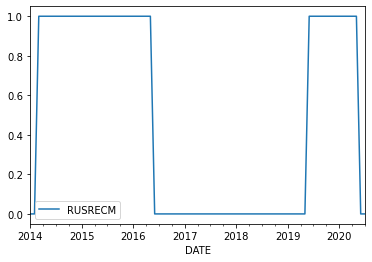

In [138]:
recession_indicator.plot()

<AxesSubplot:xlabel='TRADEDATE'>

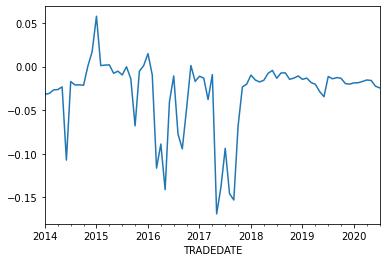

In [139]:
thetas['Trust Constrained']['Manousopoulos'].beta1.groupby(pd.Grouper(freq='1m')).median().plot()

In [106]:
thetas['Trust Constrained']['Diebold, Li'].beta1.groupby(pd.Grouper(freq='1m')).median().tail()

TRADEDATE
2020-03-31   -0.017117
2020-04-30   -0.015375
2020-05-31   -0.015822
2020-06-30   -0.022583
2020-07-31   -0.024383
Freq: M, Name: beta1, dtype: float64

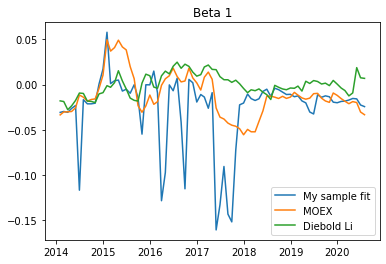

In [84]:
plt.plot(thetas['Trust Constrained']['Diebold, Li'].beta1.groupby(pd.Grouper(freq='1m')).median(), label = 'My sample fit')
plt.plot(moex_thetas.B2.groupby(pd.Grouper(freq='1m')).median(), label = 'MOEX')
plt.plot(diebold_li_weights.beta1.groupby(pd.Grouper(freq='1m')).mean(), label = 'Diebold Li')
plt.title('Beta 1')
plt.legend()

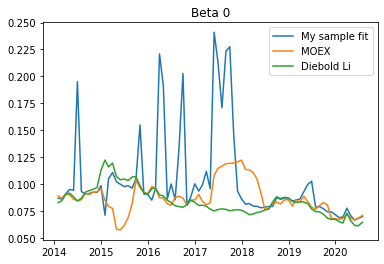

In [85]:
plt.plot(thetas['Trust Constrained']['Diebold, Li'].beta0.groupby(pd.Grouper(freq='1m')).median(), label = 'My sample fit')
plt.plot(moex_thetas.B1.groupby(pd.Grouper(freq='1m')).median(), label = 'MOEX')
plt.plot(diebold_li_weights.beta0.groupby(pd.Grouper(freq='1m')).mean(), label = 'Diebold Li')
plt.title('Beta 0')
plt.legend()

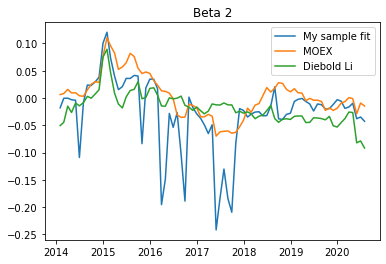

In [87]:
plt.plot(thetas['Trust Constrained']['Diebold, Li'].beta2.groupby(pd.Grouper(freq='1m')).median(), label = 'My sample fit')
plt.plot(moex_thetas.B3.groupby(pd.Grouper(freq='1m')).median(), label = 'MOEX')
plt.plot(diebold_li_weights.beta2.groupby(pd.Grouper(freq='1m')).mean(), label = 'Diebold Li')
plt.title('Beta 2')
plt.legend()

<AxesSubplot:xlabel='TRADEDATE'>

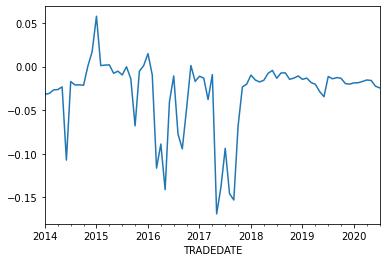

In [70]:
thetas['Trust Constrained']['Manousopoulos'].beta1.groupby(pd.Grouper(freq='1m')).median().plot()

<AxesSubplot:xlabel='TRADEDATE'>

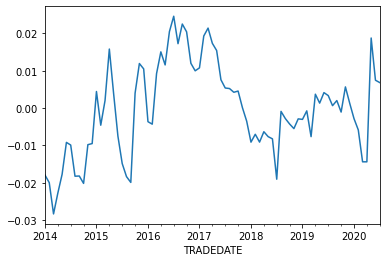

In [79]:
diebold_li_weights.beta1.groupby(pd.Grouper(freq='1m')).median().plot()